In [18]:
import numpy as np
import matplotlib.pyplot as plt
import time

# a)

In [19]:
def vecino(s, j, L, empty):
    if j == 0:  
        if s % L == L - 1:
            return empty
        else:
            return s + 1
    elif j == 1:  
        if s // L == L - 1:
            return empty
        else:
            return s + L
    elif j == 2:  
        if s % L == 0:
            return empty
        else:
            return s - 1
    elif j == 3:  
        if s // L == 0:
            return empty
        else:
            return s - L

def boundaries(L, N, empty):
    nn = np.zeros((N, 4), dtype=int)
    for s in range(N):
        for j in range(4):
            nn[s, j] = vecino(s, j, L, empty)
    return nn

In [20]:
def IsingSquare(steps, T, L, nn, initial_state='random'):
    N = L * L
    
    if initial_state == 'random':
        red = np.random.choice([-1, 1], size=N)
    else:
        red = np.ones(N, dtype=int)

    beta = 1.0 / T
    J = 1
    mag = np.sum(red)
    magzota = [mag / N]
    e = -J * sum(red[i] * red[nn[i, :]].sum() for i in range(N)) // 2
    ezota = [e / N]
    expon = {4: np.exp(-4 * J * beta), 8: np.exp(-8 * J * beta)}

    for steps in range(steps):
        sr = np.random.randint(N)
        dm = -2 * red[sr]
        de = -dm * sum(red[nn[sr, :]])
        if de <= 0 or np.random.random() < np.exp(-beta * de):
            e += de
            mag += dm
            red[sr] *= -1
        magzota.append(mag / N)
        ezota.append(e / N)

    return np.array(magzota), np.array(ezota)

In [21]:
L = 32
N = L * L
empty = -1
Ts = [1, 2.269185, 4]
steps = 10000000
nn = boundaries(L, N, empty)

res = {}
for T in Ts:
    print(f"Corriendo simulación para T = {T}")
    startTime = time.time()
    mag, e = IsingSquare(steps, T, L, nn, initial_state='ordered')
    endTime = time.time()
    res[T] = (mag, e)
    print(f"Simulación para T = {T} completada en {endTime - startTime:.2f} segundos.")

res[T]

Corriendo simulación para T = 1
Simulación para T = 1 completada en 28.26 segundos.
Corriendo simulación para T = 2.269185
Simulación para T = 2.269185 completada en 26.54 segundos.
Corriendo simulación para T = 4
Simulación para T = 4 completada en 24.63 segundos.


(array([1.        , 1.        , 1.        , ..., 0.046875  , 0.046875  ,
        0.04492188]),
 array([  -2.        ,   -2.        ,   -2.        , ..., -121.63671875,
        -121.63671875, -121.6328125 ]))

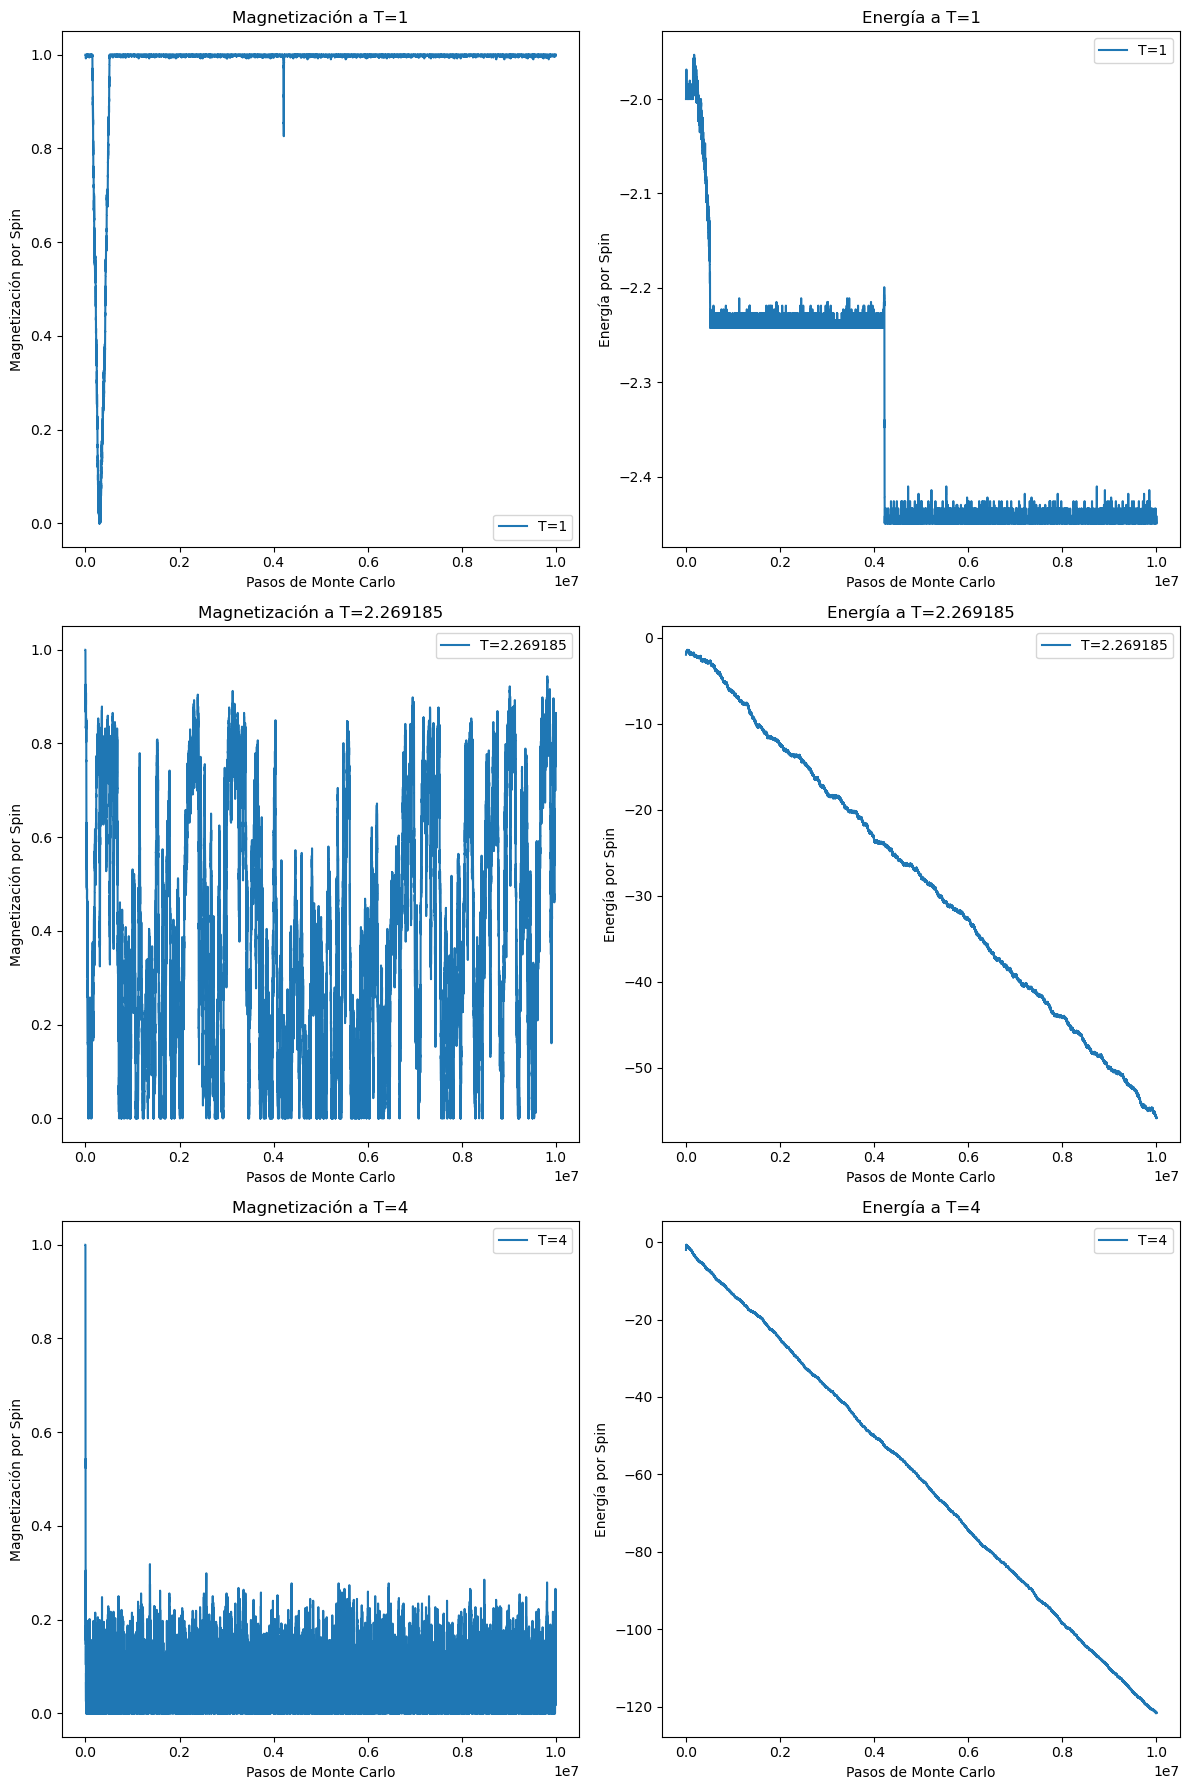

In [22]:
fig, axs = plt.subplots(len(Ts), 2, figsize=(12, 6 * len(Ts)))
for i, T in enumerate(Ts):
    axs[i, 0].plot(np.abs(res[T][0]), label=f'T={T}')
    axs[i, 0].set_title(f'Magnetización a T={T}')
    axs[i, 0].set_xlabel('Pasos de Monte Carlo')
    axs[i, 0].set_ylabel('Magnetización por Spin')
    axs[i, 0].legend()

    axs[i, 1].plot(res[T][1], label=f'T={T}')
    axs[i, 1].set_title(f'Energía a T={T}')
    axs[i, 1].set_xlabel('Pasos de Monte Carlo')
    axs[i, 1].set_ylabel('Energía por Spin')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

# b)

In [27]:
def equilibrio(mag, e, T, eSteps):
    magVals = mag[eSteps:]
    eVals = e[eSteps:]
    
    magProm = np.mean(magVals)
    eProm = np.mean(eVals)
    mag2prom = np.mean(magVals**2)
    e2prm = np.mean(eVals**2)
    
    N = len(mag) - eSteps
    k_B = 1
    
    chi = (mag2prom - magProm**2) / (k_B * T)
    C = (e2prm - eProm**2) / (k_B * T**2)
    
    return magProm, eProm, chi, C


In [35]:
eSteps = int(0.1 * steps)
equi = {}

for T in Ts:
    mag, e = res[T]
    mEeq, eEq, chi, c = equilibrio(mag, e, T, eSteps)
    equi[T] = {
        'Magnetización': mEeq,
        'Energía': eEq,
        'Susceptibilidad Magnética': chi,
        'Capacidad Calorífica': c
    }

equi

{1: {'Magnetización': -0.9991464254420639,
  'Energía': -2.3723461435240396,
  'Susceptibilidad Magnética': 1.7838680173354327e-05,
  'Capacidad Calorífica': 0.00987536103470088},
 2.269185: {'Magnetización': 0.11542954511720332,
  'Energía': -30.930129371044654,
  'Susceptibilidad Magnética': 0.09042759519603688,
  'Capacidad Calorífica': 37.950267448365},
 4: {'Magnetización': -0.0020240054174716204,
  'Energía': -67.7665451348804,
  'Susceptibilidad Magnética': 0.0018030020672725737,
  'Capacidad Calorífica': 61.97343010828445}}

# c)

In [36]:
def equilibrio2(mag, e, T, eSteps):
    magVals = mag[eSteps:]
    eVals = e[eSteps:]
    
    magProm = np.mean(magVals)
    eProm = np.mean(eVals)
    mag2prom = np.mean(magVals**2)
    e2prm = np.mean(eVals**2)
    
    N = len(mag) - eSteps
    k_B = 1
    
    chi = (mag2prom - magProm**2) / (k_B * T)
    C = (e2prm - eProm**2) / (k_B * T**2)
    
    return magProm, eProm, chi, C

In [38]:

Tc = 2.269185
Tcs = np.arange(Tc - 5 * 0.25, Tc + 5 * 0.25 + 0.01, 0.25)
tiemoEqui= int(0.15 * steps)
res = {}
mags = {}
es = {}
suceps = {}
capCals = {}

for T in Tcs:
    print(f"Corriendo simulación para T = {T}")
    startTime = time.time()
    mag, e = IsingSquare(steps, T, L, nn, initial_state='ordered')
    endTime = time.time()
    res[T] = (mag, e)    
    print(f"Simulación para T = {T} completada en {endTime - startTime:.2f} segundos.")
    pass

for T in Tcs:
    mag, e = res[T]
    mEeq, eEq, chi, c = equilibrio2(mag, e, T, eSteps) 
    mags[T] = mEeq
    es[T] = eEq
    suceps[T] = chi
    capCals[T] = c

Corriendo simulación para T = 1.0191849999999998
Simulación para T = 1.0191849999999998 completada en 22.77 segundos.
Corriendo simulación para T = 1.2691849999999998
Simulación para T = 1.2691849999999998 completada en 22.69 segundos.
Corriendo simulación para T = 1.5191849999999998
Simulación para T = 1.5191849999999998 completada en 22.15 segundos.
Corriendo simulación para T = 1.7691849999999998
Simulación para T = 1.7691849999999998 completada en 22.71 segundos.
Corriendo simulación para T = 2.019185
Simulación para T = 2.019185 completada en 22.60 segundos.
Corriendo simulación para T = 2.269185
Simulación para T = 2.269185 completada en 22.54 segundos.
Corriendo simulación para T = 2.519185
Simulación para T = 2.519185 completada en 22.16 segundos.
Corriendo simulación para T = 2.769185
Simulación para T = 2.769185 completada en 21.72 segundos.
Corriendo simulación para T = 3.019185
Simulación para T = 3.019185 completada en 21.63 segundos.
Corriendo simulación para T = 3.269185

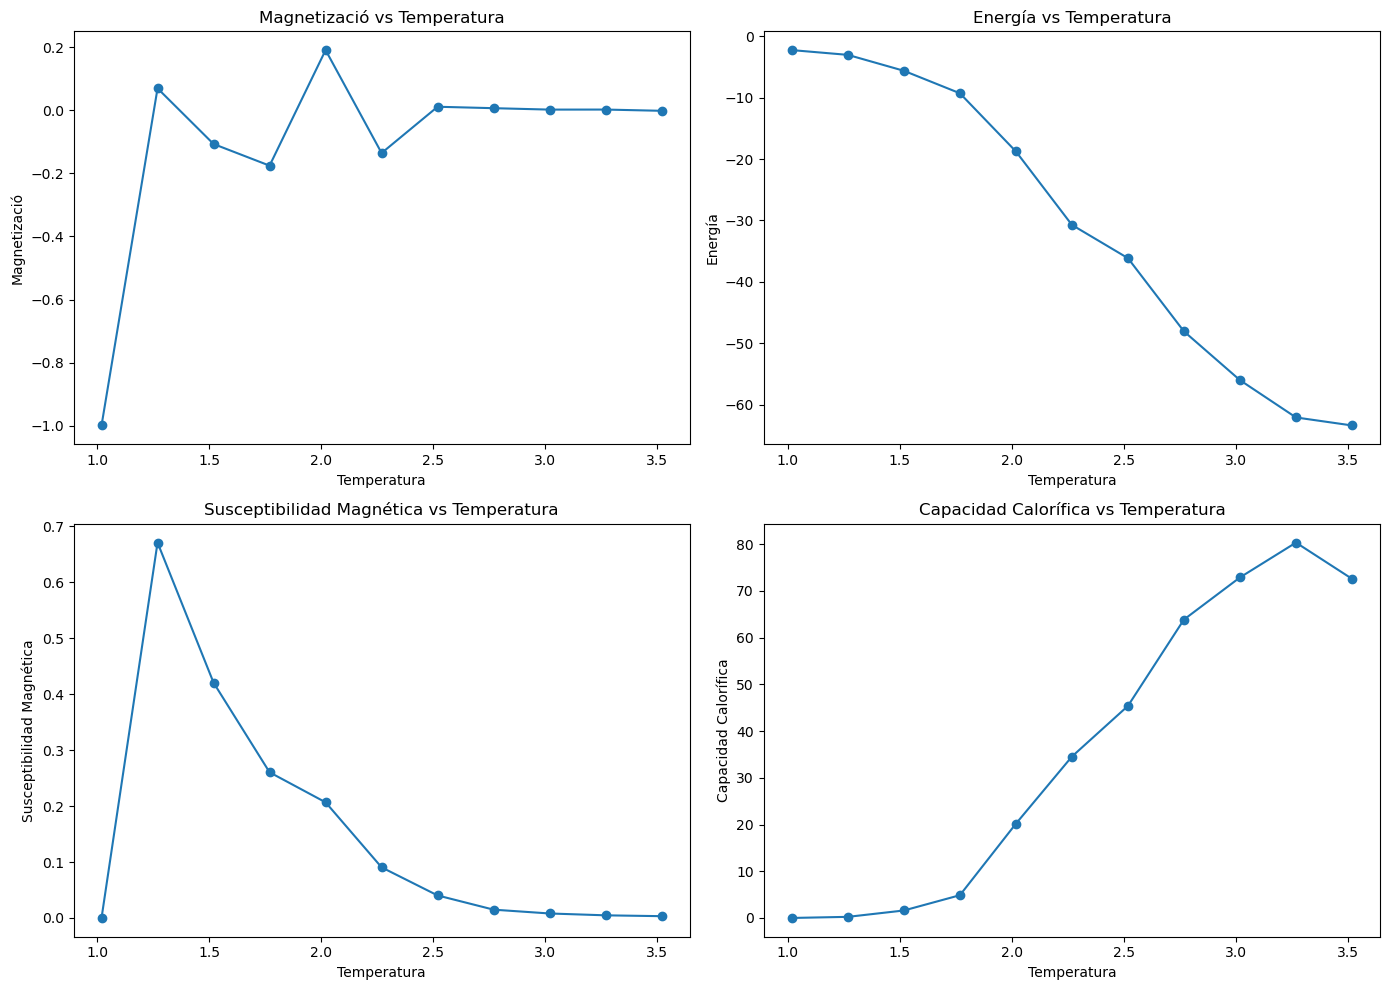

In [39]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(mags.keys(), mags.values(), marker='o', linestyle='-')
plt.title('Magnetización vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Magnetización')

plt.subplot(2, 2, 2)
plt.plot(es.keys(), es.values(), marker='o', linestyle='-')
plt.title('Energía vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Energía')

# Susceptibility plot
plt.subplot(2, 2, 3)
plt.plot(suceps.keys(), suceps.values(), marker='o', linestyle='-')
plt.title('Susceptibilidad Magnética vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Susceptibilidad Magnética')

# Heat Capacity plot
plt.subplot(2, 2, 4)
plt.plot(capCals.keys(), capCals.values(), marker='o', linestyle='-')
plt.title('Capacidad Calorífica vs Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Capacidad Calorífica')

plt.tight_layout()
plt.show()